
---


**Task-2 Unemployment Analysis with Python**


---


Unemployment is measured by the unemployment rate which is the number of people
who are unemployed as a percentage of the total labour force. We have seen a sharp
increase in the unemployment rate during Covid-19, so analyzing the unemployment rate
can be a good data science project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = "/content/Unemployment Analysis..csv"
df = pd.read_csv(file_path)

df.head()
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [3]:
# Rename columns
df.columns = [
    "State",
    "Date",
    "Frequency",
    "Estimated_Unemployment_Rate",
    "Estimated_Employed",
    "Estimated_Labour_Participation_Rate",
    "Region",
    "Longitude",
    "Latitude"
]

# Convert Date column to datetime
df["Date"] = pd.to_datetime(df["Date"])


/tmp/ipython-input-4237553266.py:15: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Date"] = pd.to_datetime(df["Date"])


/tmp/ipython-input-2567135699.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


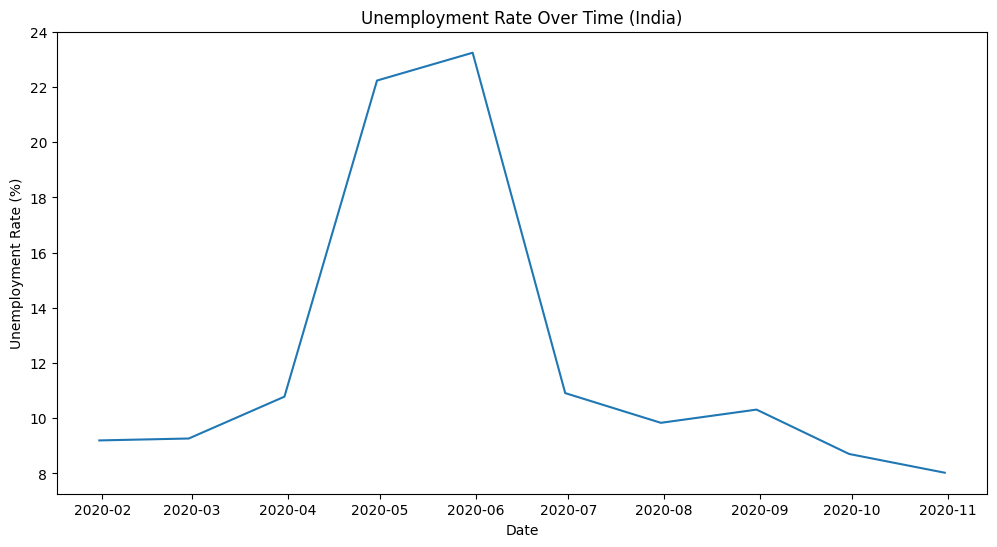

In [4]:
df.isnull().sum()

plt.figure(figsize=(12,6))
sns.lineplot(
    data=df,
    x="Date",
    y="Estimated_Unemployment_Rate",
    ci=None
)
plt.title("Unemployment Rate Over Time (India)")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.show()


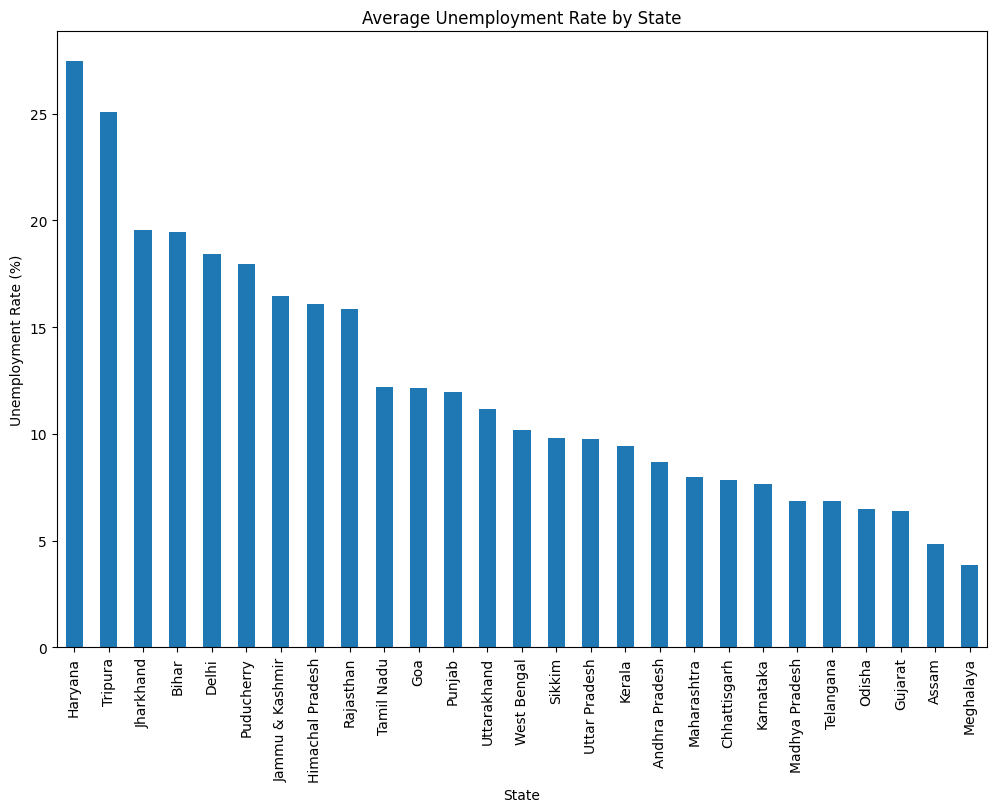

In [5]:
state_avg = df.groupby("State")["Estimated_Unemployment_Rate"].mean().sort_values(ascending=False)

plt.figure(figsize=(12,8))
state_avg.plot(kind="bar")
plt.title("Average Unemployment Rate by State")
plt.ylabel("Unemployment Rate (%)")
plt.xlabel("State")
plt.show()


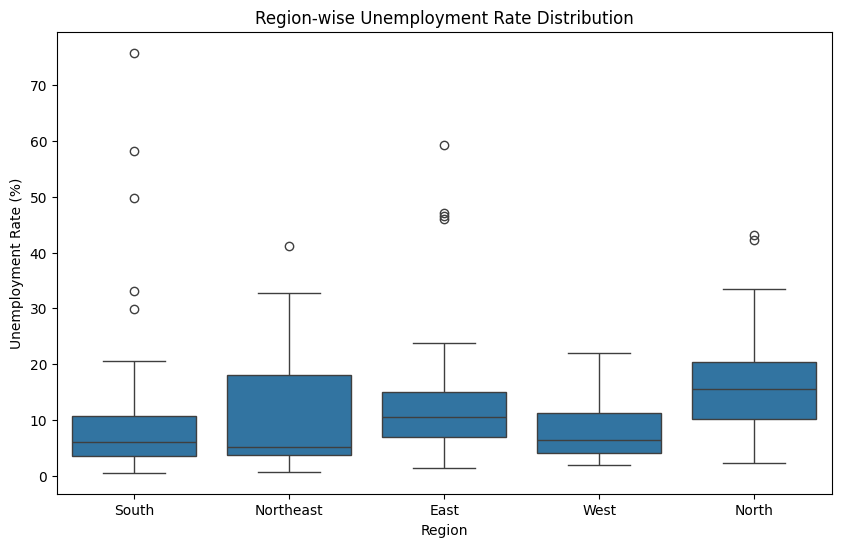

In [6]:
plt.figure(figsize=(10,6))
sns.boxplot(
    data=df,
    x="Region",
    y="Estimated_Unemployment_Rate"
)
plt.title("Region-wise Unemployment Rate Distribution")
plt.xlabel("Region")
plt.ylabel("Unemployment Rate (%)")
plt.show()


/tmp/ipython-input-1415186059.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


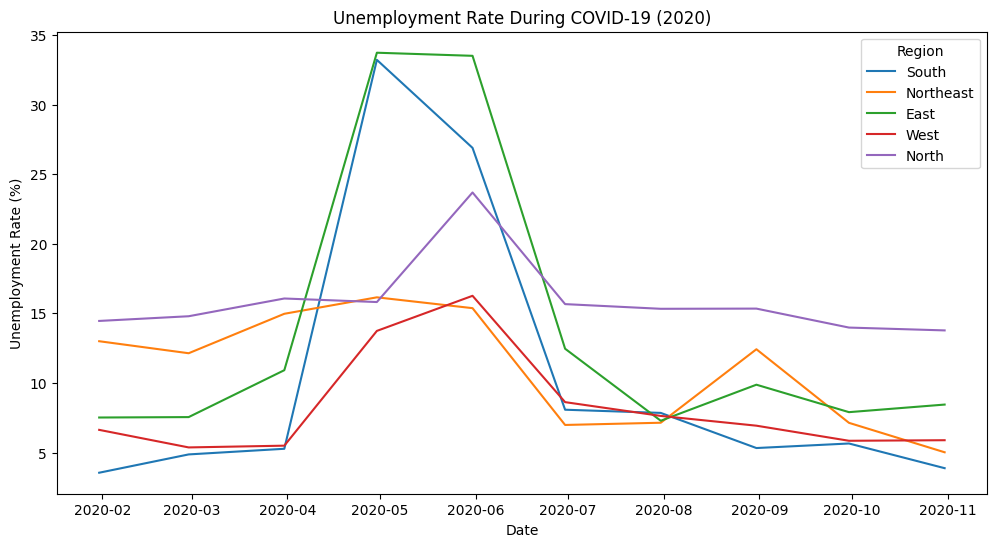

In [7]:
covid_data = df[df["Date"].dt.year == 2020]

plt.figure(figsize=(12,6))
sns.lineplot(
    data=covid_data,
    x="Date",
    y="Estimated_Unemployment_Rate",
    hue="Region",
    ci=None
)
plt.title("Unemployment Rate During COVID-19 (2020)")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.legend(title="Region")
plt.show()


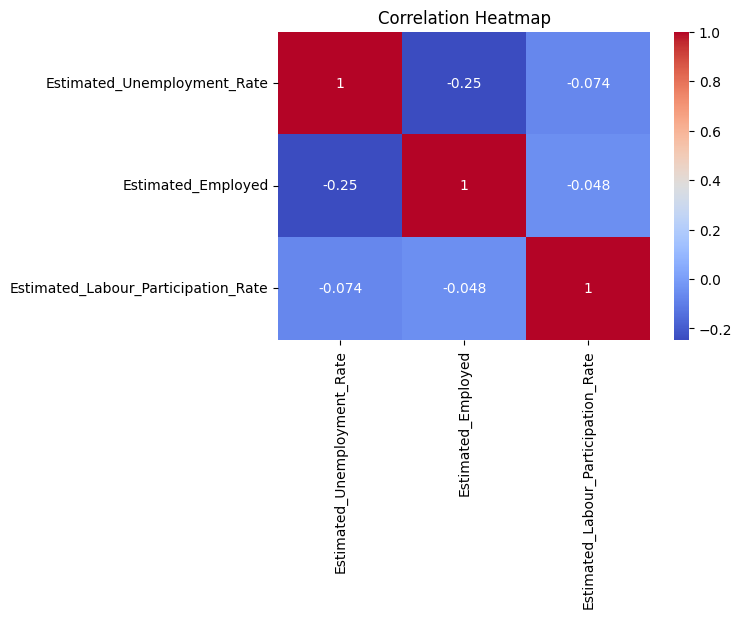

In [8]:
plt.figure(figsize=(6,4))
sns.heatmap(
    df[[
        "Estimated_Unemployment_Rate",
        "Estimated_Employed",
        "Estimated_Labour_Participation_Rate"
    ]].corr(),
    annot=True,
    cmap="coolwarm"
)
plt.title("Correlation Heatmap")
plt.show()
